In [1]:
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing
import random
import math
from sklearn.metrics import f1_score, accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import matplotlib.pyplot as mt

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

In [2]:
filename='./german_credit.csv'
data = pd.read_csv(filename)

In [3]:
Y=data['Creditability']
X=data.drop(['Creditability'],axis=1)

print(X.shape,Y.shape)

(1000, 20) (1000,)


In [4]:
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,random_state=27)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(800, 20) (200, 20) (800,) (200,)


In [5]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)

ytrainPredicted=model.predict(X_train)
ytestPredicted=model.predict(X_test)
print('trainAcc:',accuracy_score(Y_train,ytrainPredicted),' testAcc:',accuracy_score(Y_test,ytestPredicted))

trainAcc: 0.99125  testAcc: 0.765


/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/si

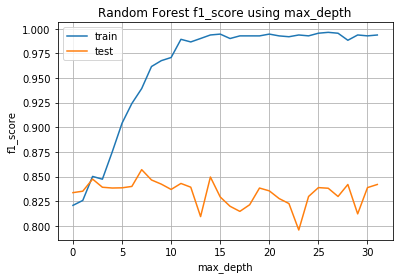

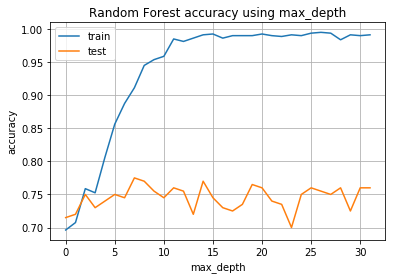

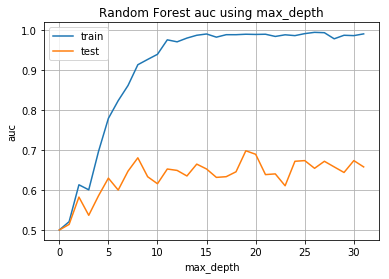

In [6]:
depth=np.linspace(1,32,32)
train_depth_f1=[]
test_depth_f1=[]
train_depth_accuracy=[]
test_depth_accuracy=[]

train_depth_auc=[]
test_depth_auc=[]

for i in depth:
    model=RandomForestClassifier(max_depth=i)
    model.fit(X_train,Y_train)
    
    ytrainPredicted=model.predict(X_train)
    ytestPredicted=model.predict(X_test)
    
    train_f1=f1_score(Y_train,ytrainPredicted)
    test_f1=f1_score(Y_test,ytestPredicted)

    train_depth_f1.append(train_f1)
    test_depth_f1.append(test_f1)
    train_depth_accuracy.append(accuracy_score(Y_train,ytrainPredicted))
    test_depth_accuracy.append(accuracy_score(Y_test,ytestPredicted))
    
    FP,TP,thresholds=roc_curve(Y_train,ytrainPredicted)
    train_depth_auc.append(auc(FP,TP))
    FP,TP,thresholds=roc_curve(Y_test,ytestPredicted)
    test_depth_auc.append(auc(FP,TP))

mt.title('Random Forest f1_score using max_depth') 
mt.plot(range(len(train_depth_f1)),train_depth_f1,label='train')
mt.plot(range(len(test_depth_f1)),test_depth_f1,label='test')
mt.legend()
mt.grid()
mt.xlabel('max_depth')
mt.ylabel('f1_score')
mt.show()

mt.title('Random Forest accuracy using max_depth')
mt.plot(range(len(train_depth_accuracy)),train_depth_accuracy,label='train')
mt.plot(range(len(test_depth_accuracy)),test_depth_accuracy,label='test')
mt.legend()
mt.grid()
mt.xlabel('max_depth')
mt.ylabel('accuracy')
mt.show()

mt.title('Random Forest auc using max_depth')
mt.plot(range(len(train_depth_auc)),train_depth_auc,label='train')
mt.plot(range(len(test_depth_auc)),test_depth_auc,label='test')
mt.legend()
mt.grid()
mt.xlabel('max_depth')
mt.ylabel('auc')
mt.show()

/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/si

/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/si

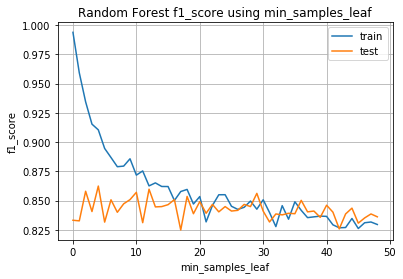

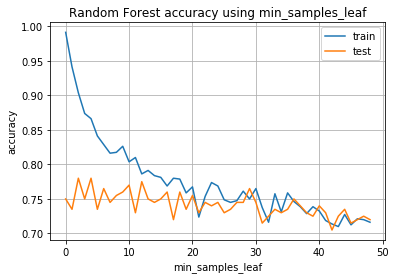

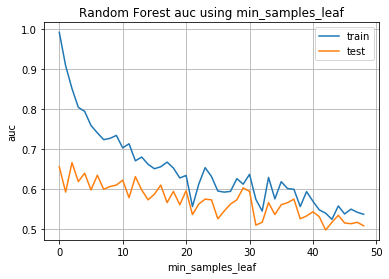

In [7]:
minSamplesLeaf=np.linspace(0.01,0.5,5,dtype=None)
train_minSamplesLeaf_f1=[]
test_minSamplesLeaf_f1=[]
train_minSamplesLeaf_accuracy=[]
test_minSamplesLeaf_accuracy=[]


train_minSamplesLeaf_auc=[]
test_minSamplesLeaf_auc=[]

# for i in minSamplesLeaf:
for i in range(1,50):
    model=RandomForestClassifier(min_samples_leaf=i)
    model.fit(X_train,Y_train)
    
    ytrainPredicted=model.predict(X_train)
    ytestPredicted=model.predict(X_test)
    
    train_f1=f1_score(Y_train,ytrainPredicted)
    test_f1=f1_score(Y_test,ytestPredicted)
    
    train_minSamplesLeaf_f1.append(train_f1)
    test_minSamplesLeaf_f1.append(test_f1)
    train_minSamplesLeaf_accuracy.append(accuracy_score(Y_train,ytrainPredicted))
    test_minSamplesLeaf_accuracy.append(accuracy_score(Y_test,ytestPredicted))

    FP,TP,thresholds=roc_curve(Y_train,ytrainPredicted)
    train_minSamplesLeaf_auc.append(auc(FP,TP))
    FP,TP,thresholds=roc_curve(Y_test,ytestPredicted)
    test_minSamplesLeaf_auc.append(auc(FP,TP))

mt.title('Random Forest f1_score using min_samples_leaf')
mt.plot(range(len(train_minSamplesLeaf_f1)),train_minSamplesLeaf_f1,label='train')
mt.plot(range(len(test_minSamplesLeaf_f1)),test_minSamplesLeaf_f1,label='test')
mt.legend()
mt.grid()
mt.xlabel('min_samples_leaf')
mt.ylabel('f1_score')
mt.show()

mt.title('Random Forest accuracy using min_samples_leaf')
mt.plot(range(len(train_minSamplesLeaf_accuracy)),train_minSamplesLeaf_accuracy,label='train')
mt.plot(range(len(test_minSamplesLeaf_accuracy)),test_minSamplesLeaf_accuracy,label='test')
mt.legend()
mt.grid()
mt.xlabel('min_samples_leaf')
mt.ylabel('accuracy')
mt.show()

mt.title('Random Forest auc using min_samples_leaf')
mt.plot(range(len(train_minSamplesLeaf_auc)),train_minSamplesLeaf_auc,label='train')
mt.plot(range(len(test_minSamplesLeaf_auc)),test_minSamplesLeaf_auc,label='test')
mt.legend()
mt.grid()
mt.xlabel('min_samples_leaf')
mt.ylabel('auc')
mt.show()

/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/subhani007/.local/lib/python3.6/si

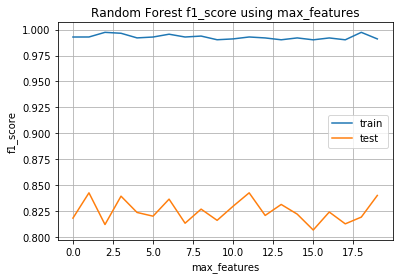

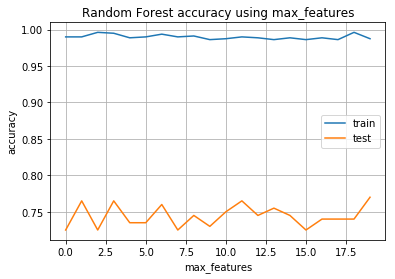

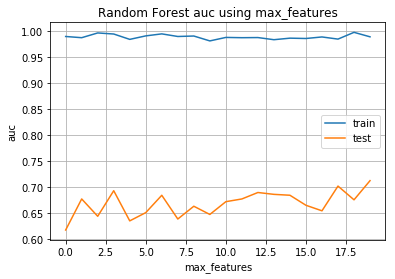

In [8]:
maxFeatures=np.linspace(1,20,20,dtype=int)
train_maxFeatures_f1=[]
test_maxFeatures_f1=[]
train_maxFeatures_accuracy=[]
test_maxFeatures_accuracy=[]

train_maxFeatures_auc=[]
test_maxFeatures_auc=[]

for i in maxFeatures:
    model=RandomForestClassifier(max_features=i)
    model.fit(X_train,Y_train)
    
    ytrainPredicted=model.predict(X_train)
    ytestPredicted=model.predict(X_test)
    
    train_f1=f1_score(Y_train,ytrainPredicted)
    test_f1=f1_score(Y_test,ytestPredicted)
    train_maxFeatures_f1.append(train_f1)
    test_maxFeatures_f1.append(test_f1)
    
    train_maxFeatures_accuracy.append(accuracy_score(Y_train,ytrainPredicted))
    test_maxFeatures_accuracy.append(accuracy_score(Y_test,ytestPredicted))

    FP,TP,thresholds=roc_curve(Y_train,ytrainPredicted)
    train_maxFeatures_auc.append(auc(FP,TP))
    FP,TP,thresholds=roc_curve(Y_test,ytestPredicted)
    test_maxFeatures_auc.append(auc(FP,TP))

mt.title('Random Forest f1_score using max_features')
mt.plot(range(len(train_maxFeatures_f1)),train_maxFeatures_f1,label='train')
mt.plot(range(len(test_maxFeatures_f1)),test_maxFeatures_f1,label='test')
mt.legend()
mt.grid()
mt.xlabel('max_features')
mt.ylabel('f1_score')
mt.show()

mt.title('Random Forest accuracy using max_features')
mt.plot(range(len(train_maxFeatures_accuracy)),train_maxFeatures_accuracy,label='train')
mt.plot(range(len(test_maxFeatures_accuracy)),test_maxFeatures_accuracy,label='test')
mt.legend()
mt.grid()
mt.xlabel('max_features')
mt.ylabel('accuracy')
mt.show()

mt.title('Random Forest auc using max_features')
mt.plot(range(len(train_maxFeatures_auc)),train_maxFeatures_auc,label='train')
mt.plot(range(len(test_maxFeatures_auc)),test_maxFeatures_auc,label='test')
mt.legend()
mt.grid()
mt.xlabel('max_features')
mt.ylabel('auc')
mt.show()

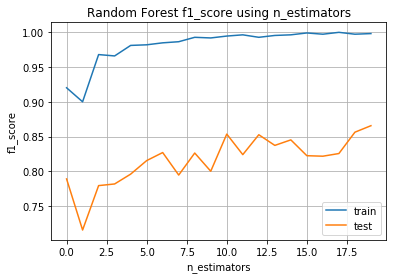

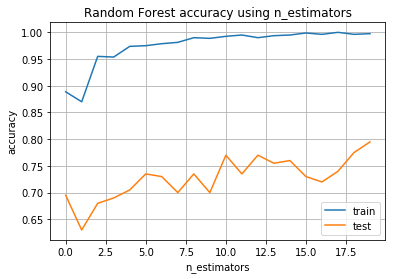

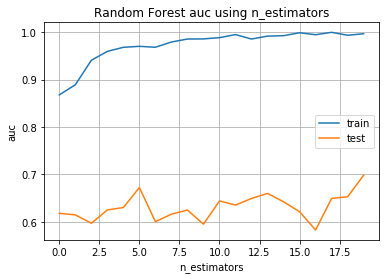

In [13]:
nEstimators=np.linspace(1,20,20,dtype=int)
train_nEstimators_f1=[]
test_nEstimators_f1=[]
train_nEstimators_accuracy=[]
test_nEstimators_accuracy=[]

train_nEstimators_auc=[]
test_nEstimators_auc=[]

for i in nEstimators:
    model=RandomForestClassifier(n_estimators=i)
    model.fit(X_train,Y_train)
    
    ytrainPredicted=model.predict(X_train)
    ytestPredicted=model.predict(X_test)
    
    train_f1=f1_score(Y_train,ytrainPredicted)
    test_f1=f1_score(Y_test,ytestPredicted)
    train_nEstimators_f1.append(train_f1)
    test_nEstimators_f1.append(test_f1)
    
    train_nEstimators_accuracy.append(accuracy_score(Y_train,ytrainPredicted))
    test_nEstimators_accuracy.append(accuracy_score(Y_test,ytestPredicted))

    FP,TP,thresholds=roc_curve(Y_train,ytrainPredicted)
    train_nEstimators_auc.append(auc(FP,TP))
    FP,TP,thresholds=roc_curve(Y_test,ytestPredicted)
    test_nEstimators_auc.append(auc(FP,TP))
    

mt.title('Random Forest f1_score using n_estimators')
mt.plot(range(len(train_nEstimators_f1)),train_nEstimators_f1,label='train')
mt.plot(range(len(test_nEstimators_f1)),test_nEstimators_f1,label='test')
mt.legend()
mt.grid()
mt.xlabel('n_estimators')
mt.ylabel('f1_score')
mt.show()

mt.title('Random Forest accuracy using n_estimators')
mt.plot(range(len(train_nEstimators_accuracy)),train_nEstimators_accuracy,label='train')
mt.plot(range(len(test_nEstimators_accuracy)),test_nEstimators_accuracy,label='test')
mt.legend()
mt.grid()
mt.xlabel('n_estimators')
mt.ylabel('accuracy')
mt.show()

mt.title('Random Forest auc using n_estimators')
mt.plot(range(len(train_nEstimators_auc)),train_nEstimators_auc,label='train')
mt.plot(range(len(test_nEstimators_auc)),test_nEstimators_auc,label='test')
mt.legend()
mt.grid()
mt.xlabel('n_estimators')
mt.ylabel('auc')
mt.show()

# Best Model

In [14]:
bestModel=RandomForestClassifier(n_estimators=8,max_depth=11,max_features=11,min_samples_leaf=3)
bestModel.fit(X_train,Y_train)

ytrainPredicted=bestModel.predict(X_train)
ytestPredicted=bestModel.predict(X_test)
print('trainAcc:',accuracy_score(Y_train,ytrainPredicted),' testAcc:',accuracy_score(Y_test,ytestPredicted))
print(f1_score(Y_train,ytrainPredicted),f1_score(Y_test,ytestPredicted))

trainAcc: 0.92625  testAcc: 0.72
0.94874022589053 0.8181818181818182


[0.74074074 0.74074074 0.71604938 0.7375     0.75       0.7375
 0.775      0.72151899 0.67088608 0.6835443 ]


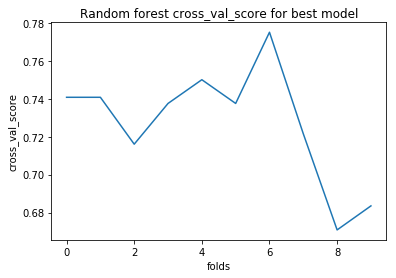

In [16]:
random_scores=cross_val_score(bestModel,X_train,Y_train,cv=10)
print(random_scores)

mt.title('Random forest cross_val_score for best model')
mt.plot(range(len(random_scores)),random_scores,label='cross_val_score')
mt.xlabel('folds')
mt.ylabel('cross_val_score')
mt.show()

In [17]:
joblib.dump(bestModel,'randomForestBestModel.joblib')

['randomForestBestModel.joblib']